## 1. Importacion de librerias

In [151]:
# Instalación de librerias
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
import numpy as np
import sys
import seaborn as sns
from collections import Counter

import re, string, unicodedata
import contractions
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, \
multilabel_confusion_matrix, classification_report
from sklearn.multioutput import ClassifierChain, MultiOutputClassifier
from sklearn import metrics
from skmultilearn.problem_transform import BinaryRelevance
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2. Carga de datos

In [2]:
scopusData = pd.read_csv('app/data/scopusArticles.csv', sep=',', encoding = 'utf-8')
scopusData.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Lichtenberg G.; Pangalos G.,"Lichtenberg, Gerwald (23978244400); Pangalos, ...",23978244400; 57217836266,Constructive Alignment by Portfolio Exams for ...,2022,IFAC-PapersOnLine,55,17,NaN,194,...,NaN,NaN,NaN,English,IFAC-PapersOnLine,Conference paper,Final,All Open Access; Bronze Open Access,Scopus,2-s2.0-85142285954
1,Bokrantz J.; Subramaniyan M.; Skoogh A.,"Bokrantz, Jon (56786404500); Subramaniyan, Muk...",56786404500; 57191544364; 24588061100,Realising the promises of artificial intellige...,2023,Production Planning and Control,NaN,NaN,NaN,NaN,...,NaN,PPCOE,NaN,English,Prod Plann Control,Article,Article in press,All Open Access; Green Open Access; Hybrid Gol...,Scopus,2-s2.0-85165183489
2,Yokota T.; Pagkalinawan H.,"Yokota, Toshiyuki (57962746500); Pagkalinawan,...",57962746500; 57194039166,Application of Geographic Information Systems ...,2022,Transportation Research Record,2676,11,NaN,171,...,NaN,TRRED,NaN,English,Transp Res Rec,Book chapter,Final,NaN,Scopus,2-s2.0-85141811114
3,Al Janabi M.A.M.,"Al Janabi, Mazin A.M. (24463149200)",24463149200,Optimization algorithms and investment portfol...,2022,Journal of Modelling in Management,17,3,NaN,864,...,NaN,NaN,NaN,English,J. Model. Manage.,Article,Final,NaN,Scopus,2-s2.0-85106274228
4,Giuffrè M.; Shung D.L.,"Giuffrè, Mauro (57210704630); Shung, Dennis L....",57210704630; 56447050200,Harnessing the power of synthetic data in heal...,2023,npj Digital Medicine,6,1,186,NaN,...,NaN,NaN,NaN,English,npj Digit. Med.,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85173631012


In [3]:
originalFrameworkData = pd.read_csv('app/data/verifiedArticles.csv', sep=',', encoding = 'ANSI')
originalFrameworkData.head()

,Title,Authors,Year,Cited by,Abstract,DOI,Link,EID,Criterios,Publicación,Cómo aporta la analítica?,PUBLISHER,H-Index,Quartiles,Nota,URL,Unnamed: 16
0,A Dashboard to Support Management of Business ...,Santiago Rivera D.; Shanks G.,2015,22.0,Business analytics (BA) systems create value a...,10.1080/12460125.2015.994335,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-84924258742,Alineación con la estrategia y objetivos,Journal of Decision Systems,Cómo alinearse con la estrategía a partir de l...,NaN,28.0,Library and Information Sciences \t2022 \tQ1\r...,NaN,NaN,researchgate
1,Project portfolio selection problems: A review...,Mohagheghi V.; Mousavi S.M.; Antuchevi?ien? J....,2019,18.0,Project portfolio selection has been the focus...,10.3846/tede.2019.11410,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-85076850409,Criterios para establecer objetivos de valor,Technological and Economic Development of Economy,Cómo la analítica aporta en la selección de pr...,Vilnius Gediminas Technical University,59.0,Finance\t 2022 \tQ2,NaN,NaN,NaN
2,A decision-making framework for project portfo...,Sampath S.; Gel E.S.; Fowler J.W.; Kempf K.G.,2015,12.0,The work we describe addresses the problem of ...,10.1287/inte.2015.0809,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-84949207726,Alineación con la estrategia y objetivos,Interfaces,Cómo la analítica aporta en la gestión y plane...,NaN,69.0,Management of Technology and Innovation \t2022...,NaN,NaN,NaN
3,Big data analytics in innovation processes: wh...,Capurro R.; Fiorentino R.; Garzella S.; Giudic...,2021,7.0,Purpose: The purpose of this paper is to analy...,10.1108/EJIM-05-2021-0256,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-85110841823,Optimización,European Journal of Innovation\r\nManagement,Cómo la analítica permite optimizar la gestión...,Emerald Group Publishing Ltd.,74.0,Management of Technology and Innovation \t2022...,NaN,NaN,NaN
4,A Data-driven project categorization process f...,"El bok G., Berrado A.",2022,2.0,Purpose: Categorizing projects allows for bett...,10.1108/JM2-10-2020-0257,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-85109023786,Selección,Journal of Modelling in\r\nManagement,NaN,NaN,37.0,Decision Sciences (miscellaneous) \t2022 \tQ2\...,NaN,NaN,NaN


## 3. Entendimiento de datos

In [4]:
print("Number of initial documents in Scopus dataframe: " + str(scopusData.shape[0]))

Number of initial documents in Scopus dataframe: 2382


In [5]:
print("Number of duplicated documents in Scopus dataframe: " + str(scopusData.duplicated().sum()))

Number of duplicated documents in Scopus dataframe: 659


In [6]:
scopusData = scopusData.drop_duplicates()
print("Number of different documents in Scopus dataframe: " + str(scopusData.shape[0]))

Number of different documents in Scopus dataframe: 1723


In [7]:
scopusData.isnull().sum(axis = 0)

Authors                           172
Author full names                 172
Author(s) ID                      172
Title                               0
Year                                0
Source title                        2
Volume                            563
Issue                            1144
Art. No.                         1351
Page start                        541
Page end                          554
Page count                        445
Cited by                            0
DOI                               420
Link                                0
Affiliations                      207
Authors with affiliations         207
Abstract                            0
Author Keywords                   499
Index Keywords                    642
Molecular Sequence Numbers       1723
Chemicals/CAS                    1721
Tradenames                       1722
Manufacturers                    1723
Funding Details                  1367
Funding Texts                    1387
References  

In [8]:
print("Number of initial documents on the framework file: " + str(originalFrameworkData.shape[0]))

Number of initial documents on the framework file: 69


In [9]:
originalFrameworkData.isnull().sum(axis = 0)

Title                         0
Authors                       0
Year                          0
Cited by                     13
Abstract                      0
DOI                          16
Link                          1
EID                           1
Criterios                    24
Publicación                  29
Cómo aporta la analítica?    48
PUBLISHER                    38
H-Index                      38
Quartiles                    39
Nota                         61
URL                          62
Unnamed: 16                  68
dtype: int64

In [10]:
originalFrameworkData = originalFrameworkData[originalFrameworkData["Criterios"].notna()]
print("Number of significative documents on the framework file: " + str(originalFrameworkData.shape[0]))

Number of significative documents on the framework file: 45


In [11]:
originalFrameworkData["Criterios"].unique()

array(['Alineación con la estrategia y objetivos',
       'Criterios para establecer objetivos de valor', 'Optimización',
       'Selección', 'Criterios para el monitoreo y medición de valor.',
       'Medición o cuantificación de riesgos', 'Gobierno del portafolio',
       'Criterios financieros para la selección de proyectos',
       'Identificación de riesgos', 'Gestión de capacidades',
       'Métricas para el monitoreo del portafolio de proyectos',
       'Criterios para la medición de beneficios.',
       'Gestión de intersados', 'Papel de la analitica?', 'KPI',
       'Criterios financieros para la ejecución del portfolio ',
       'Priorización'], dtype=object)

## 4. Preparación de datos

### 4.1. Organización de datos iniciales

In [12]:
modifiedScopusData = scopusData.copy()
modifiedScopusData = modifiedScopusData[["Title", "Abstract", "Author Keywords", "Index Keywords"]]
modifiedScopusData.head()

,Title,Abstract,Author Keywords,Index Keywords
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...,competency graphs; Constructive alignment; exa...,Advanced control; Competency graph; Constructi...
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...,Artificial intelligence; CRISP-DM; machine lea...,Cost engineering; Economic and social effects;...
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...,data and data science; economic impacts; geogr...,COVID-19; Data visualization; Economic analysi...
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...,Analytics; Artificial intelligence; Business a...,NaN
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...,NaN,Data privacy; Decision making; Financial data ...


In [13]:
modifiedScopusData['Author Keywords'] = modifiedScopusData['Author Keywords'].fillna("")
modifiedScopusData['Index Keywords'] = modifiedScopusData['Index Keywords'].fillna("")
modifiedScopusData['Abstract'] = modifiedScopusData['Abstract'] + " " + modifiedScopusData['Title'] + " " + modifiedScopusData['Author Keywords'] + " " +  modifiedScopusData['Index Keywords']
modifiedScopusData.head()

,Title,Abstract,Author Keywords,Index Keywords
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...,competency graphs; Constructive alignment; exa...,Advanced control; Competency graph; Constructi...
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...,Artificial intelligence; CRISP-DM; machine lea...,Cost engineering; Economic and social effects;...
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...,data and data science; economic impacts; geogr...,COVID-19; Data visualization; Economic analysi...
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...,Analytics; Artificial intelligence; Business a...,
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...,,Data privacy; Decision making; Financial data ...


In [14]:
modifiedScopusData = modifiedScopusData.drop(columns = ['Index Keywords', 'Author Keywords'])
modifiedScopusData.head()

,Title,Abstract
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...


<Axes: >

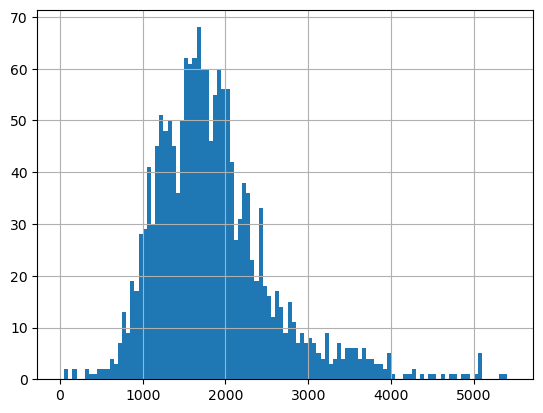

In [15]:
lensScopus = modifiedScopusData['Abstract'].str.len()
lensScopus.hist(bins = np.arange(0,5500,50))

In [16]:
modifiedFrameworkData = originalFrameworkData.copy()
modifiedFrameworkData = modifiedFrameworkData[["Title", "Abstract", "Criterios"]]
modifiedFrameworkData['Abstract'] = modifiedFrameworkData['Abstract'] + " " + modifiedFrameworkData['Title']
modifiedFrameworkData.head()

,Title,Abstract,Criterios
0,A Dashboard to Support Management of Business ...,Business analytics (BA) systems create value a...,Alineación con la estrategia y objetivos
1,Project portfolio selection problems: A review...,Project portfolio selection has been the focus...,Criterios para establecer objetivos de valor
2,A decision-making framework for project portfo...,The work we describe addresses the problem of ...,Alineación con la estrategia y objetivos
3,Big data analytics in innovation processes: wh...,Purpose: The purpose of this paper is to analy...,Optimización
4,A Data-driven project categorization process f...,Purpose: Categorizing projects allows for bett...,Selección


<Axes: >

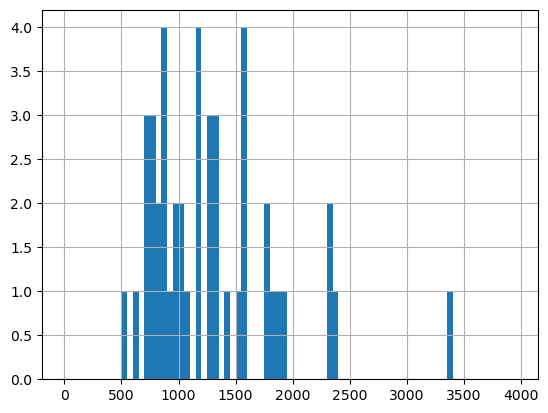

In [17]:
lensFramework = modifiedFrameworkData['Abstract'].str.len()
lensFramework.hist(bins = np.arange(0,4000,50))

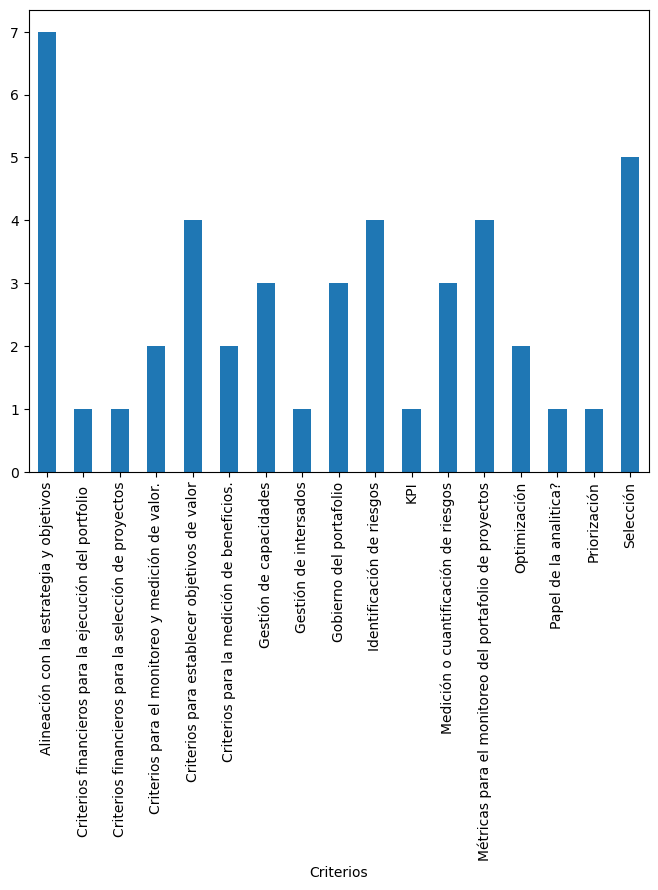

In [18]:
fig = plt.figure(figsize=(8,6))
modifiedFrameworkData.groupby('Criterios').Abstract.count().plot.bar(ylim=0)
plt.show()

In [19]:
criteria = modifiedFrameworkData['Criterios'].unique().tolist()
print(criteria)

['Alineación con la estrategia y objetivos', 'Criterios para establecer objetivos de valor', 'Optimización', 'Selección', 'Criterios para el monitoreo y medición de valor.', 'Medición o cuantificación de riesgos', 'Gobierno del portafolio', 'Criterios financieros para la selección de proyectos', 'Identificación de riesgos', 'Gestión de capacidades', 'Métricas para el monitoreo del portafolio de proyectos', 'Criterios para la medición de beneficios.', 'Gestión de intersados', 'Papel de la analitica?', 'KPI', 'Criterios financieros para la ejecución del portfolio ', 'Priorización']


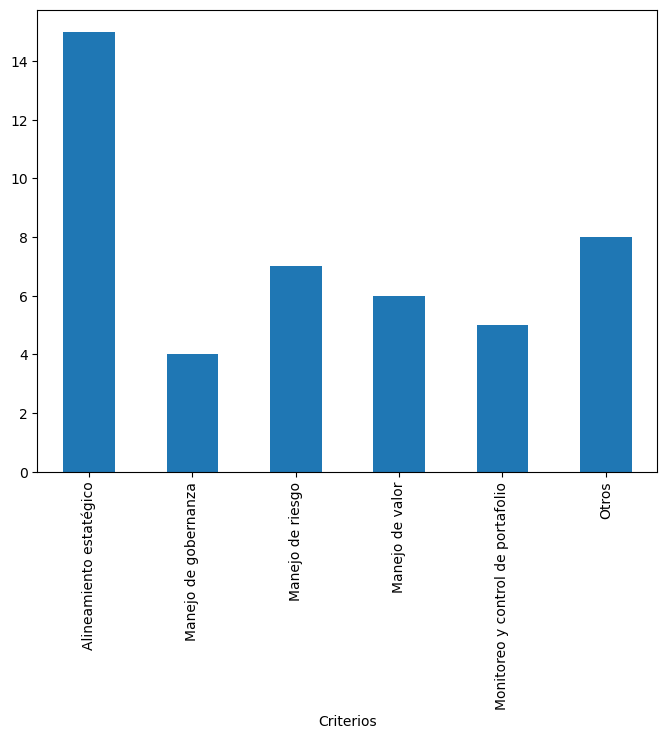

In [20]:
modifiedFrameworkData['Criterios'] = modifiedFrameworkData['Criterios'].replace(['Alineación con la estrategia y objetivos', 'Selección', 'Priorización', 'Optimización'], 'Alineamiento estatégico')
modifiedFrameworkData['Criterios'] = modifiedFrameworkData['Criterios'].replace(['Papel de la analitica?', 'Gobierno del portafolio'], 'Manejo de gobernanza')
modifiedFrameworkData['Criterios'] = modifiedFrameworkData['Criterios'].replace(['Identificación de riesgos', 'Medición o cuantificación de riesgos'], 'Manejo de riesgo')
modifiedFrameworkData['Criterios'] = modifiedFrameworkData['Criterios'].replace(['Criterios para el monitoreo y medición de valor.', 'Criterios para establecer objetivos de valor'], 'Manejo de valor')
modifiedFrameworkData['Criterios'] = modifiedFrameworkData['Criterios'].replace(['Métricas para el monitoreo del portafolio de proyectos', 'KPI'], 'Monitoreo y control de portafolio')
modifiedFrameworkData['Criterios'] = modifiedFrameworkData['Criterios'].replace(['Gestión de intersados', 'Criterios para la medición de beneficios.', 'Gestión de capacidades', 'Criterios financieros para la selección de proyectos', 'Criterios financieros para la ejecución del portfolio '], 'Otros')
criteria = modifiedFrameworkData['Criterios'].unique().tolist()
fig = plt.figure(figsize=(8,6))
modifiedFrameworkData.groupby('Criterios').Abstract.count().plot.bar(ylim=0)
plt.show()

### 4.2. Limpieza de datos

In [21]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def delete_numbers(words):
    """Delete all interger occurrences in list of tokenized words"""
    new_words = []
    for word in words:
        if not word.isdigit():
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words
        
    
def preprocessing(words):
    words = to_lowercase(words)
    words = delete_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

### 4.3. Tokenización

In [22]:
tokenizedFrameworkData = modifiedFrameworkData.copy()
tokenizedFrameworkData.head()

,Title,Abstract,Criterios
0,A Dashboard to Support Management of Business ...,Business analytics (BA) systems create value a...,Alineamiento estatégico
1,Project portfolio selection problems: A review...,Project portfolio selection has been the focus...,Manejo de valor
2,A decision-making framework for project portfo...,The work we describe addresses the problem of ...,Alineamiento estatégico
3,Big data analytics in innovation processes: wh...,Purpose: The purpose of this paper is to analy...,Alineamiento estatégico
4,A Data-driven project categorization process f...,Purpose: Categorizing projects allows for bett...,Alineamiento estatégico


In [23]:
tokenizedScopusData = modifiedScopusData.copy()
tokenizedScopusData.head()

,Title,Abstract
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...


In [ ]:
stop_words = stopwords.words('english')

In [25]:
tokenizedFrameworkData["Abstract"] = tokenizedFrameworkData["Abstract"].apply(contractions.fix)
tokenizedFrameworkData['Words'] = tokenizedFrameworkData['Abstract'].apply(word_tokenize).apply(preprocessing)
tokenizedFrameworkData.head()

,Title,Abstract,Criterios,Words
0,A Dashboard to Support Management of Business ...,Business analytics (BA) systems create value a...,Alineamiento estatégico,"[business, analytics, ba, systems, create, val..."
1,Project portfolio selection problems: A review...,Project portfolio selection has been the focus...,Manejo de valor,"[project, portfolio, selection, focus, many, s..."
2,A decision-making framework for project portfo...,The work we describe addresses the problem of ...,Alineamiento estatégico,"[work, describe, addresses, problem, deciding,..."
3,Big data analytics in innovation processes: wh...,Purpose: The purpose of this paper is to analy...,Alineamiento estatégico,"[purpose, purpose, paper, analyze, dynamic, ca..."
4,A Data-driven project categorization process f...,Purpose: Categorizing projects allows for bett...,Alineamiento estatégico,"[purpose, categorizing, projects, allows, bett..."


In [26]:
tokenizedScopusData["Abstract"] = tokenizedScopusData["Abstract"].apply(contractions.fix)
tokenizedScopusData['Words'] = tokenizedScopusData['Abstract'].apply(word_tokenize).apply(preprocessing)
tokenizedScopusData.head()

,Title,Abstract,Words
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...,"[paper, shows, useful, paradigm, constructive,..."
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...,"[support, manufacturing, firms, realising, val..."
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...,"[new, technologies, global, datasets, enable, ..."
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...,"[purpose, paper, aims, examine, commodity, por..."
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...,"[datadriven, decisionmaking, modern, healthcar..."


### 4.4. Normalización

In [27]:
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [28]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    new_words = []
    for word in words:
        new_word = stemmer.stem(word)
        new_words.append(new_word)
    return new_words

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    new_words = []
    for word in words:
        new_word = lemmatizer.lemmatize(word)
        new_words.append(new_word)
    return new_words

def stem_and_lemmatize(words):
    words = lemmatize_verbs(words)
    words = stem_words(words)
    return words

In [29]:
tokenizedFrameworkData['Words'] = tokenizedFrameworkData['Words'].apply(lemmatize_verbs)
tokenizedFrameworkData.head()

,Title,Abstract,Criterios,Words
0,A Dashboard to Support Management of Business ...,Business analytics (BA) systems create value a...,Alineamiento estatégico,"[business, analytics, ba, system, create, valu..."
1,Project portfolio selection problems: A review...,Project portfolio selection has been the focus...,Manejo de valor,"[project, portfolio, selection, focus, many, s..."
2,A decision-making framework for project portfo...,The work we describe addresses the problem of ...,Alineamiento estatégico,"[work, describe, address, problem, deciding, p..."
3,Big data analytics in innovation processes: wh...,Purpose: The purpose of this paper is to analy...,Alineamiento estatégico,"[purpose, purpose, paper, analyze, dynamic, ca..."
4,A Data-driven project categorization process f...,Purpose: Categorizing projects allows for bett...,Alineamiento estatégico,"[purpose, categorizing, project, allows, bette..."


In [30]:
tokenizedFrameworkData['Words'] = tokenizedFrameworkData['Words'].apply(lambda x: ' '.join(map(str, x)))
tokenizedFrameworkData.head()

,Title,Abstract,Criterios,Words
0,A Dashboard to Support Management of Business ...,Business analytics (BA) systems create value a...,Alineamiento estatégico,business analytics ba system create value prov...
1,Project portfolio selection problems: A review...,Project portfolio selection has been the focus...,Manejo de valor,project portfolio selection focus many scholar...
2,A decision-making framework for project portfo...,The work we describe addresses the problem of ...,Alineamiento estatégico,work describe address problem deciding project...
3,Big data analytics in innovation processes: wh...,Purpose: The purpose of this paper is to analy...,Alineamiento estatégico,purpose purpose paper analyze dynamic capabili...
4,A Data-driven project categorization process f...,Purpose: Categorizing projects allows for bett...,Alineamiento estatégico,purpose categorizing project allows better ali...


In [31]:
tokenizedFrameworkData.to_csv('app/data/tokenizedFrameworkData.csv')

In [32]:
tokenizedFrameworkData['category_id'] = tokenizedFrameworkData['Criterios'].factorize()[0]
category_id_df = tokenizedFrameworkData[['Criterios', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Criterios']].values)
tokenizedFrameworkData.head()

,Title,Abstract,Criterios,Words,category_id
0,A Dashboard to Support Management of Business ...,Business analytics (BA) systems create value a...,Alineamiento estatégico,business analytics ba system create value prov...,0
1,Project portfolio selection problems: A review...,Project portfolio selection has been the focus...,Manejo de valor,project portfolio selection focus many scholar...,1
2,A decision-making framework for project portfo...,The work we describe addresses the problem of ...,Alineamiento estatégico,work describe address problem deciding project...,0
3,Big data analytics in innovation processes: wh...,Purpose: The purpose of this paper is to analy...,Alineamiento estatégico,purpose purpose paper analyze dynamic capabili...,0
4,A Data-driven project categorization process f...,Purpose: Categorizing projects allows for bett...,Alineamiento estatégico,purpose categorizing project allows better ali...,0


In [33]:
tokenizedScopusData['Words'] = tokenizedScopusData['Words'].apply(lemmatize_verbs)
tokenizedScopusData.head()

,Title,Abstract,Words
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...,"[paper, show, useful, paradigm, constructive, ..."
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...,"[support, manufacturing, firm, realising, valu..."
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...,"[new, technology, global, datasets, enable, tr..."
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...,"[purpose, paper, aim, examine, commodity, port..."
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...,"[datadriven, decisionmaking, modern, healthcar..."


In [34]:
tokenizedScopusData['Words'] = tokenizedScopusData['Words'].apply(lambda x: ' '.join(map(str, x)))
tokenizedScopusData.head()

,Title,Abstract,Words
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...,paper show useful paradigm constructive alignm...
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...,support manufacturing firm realising value art...
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...,new technology global datasets enable transpor...
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...,purpose paper aim examine commodity portfolio ...
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...,datadriven decisionmaking modern healthcare un...


In [35]:
tokenizedScopusData = tokenizedScopusData.drop(columns = ['Abstract'])
tokenizedScopusData.head()

,Title,Words
0,Constructive Alignment by Portfolio Exams for ...,paper show useful paradigm constructive alignm...
1,Realising the promises of artificial intellige...,support manufacturing firm realising value art...
2,Application of Geographic Information Systems ...,new technology global datasets enable transpor...
3,Optimization algorithms and investment portfol...,purpose paper aim examine commodity portfolio ...
4,Harnessing the power of synthetic data in heal...,datadriven decisionmaking modern healthcare un...


In [36]:
tokenizedScopusData.to_csv('app/data/tokenizedScopusData.csv')

In [37]:
criteria = tokenizedFrameworkData['Criterios'].unique().tolist()
print(criteria)

['Alineamiento estatégico', 'Manejo de valor', 'Manejo de riesgo', 'Manejo de gobernanza', 'Otros', 'Monitoreo y control de portafolio']


In [38]:
scopusWords = tokenizedScopusData['Words'].to_string().split()
scopusWords = [word for word in scopusWords if len(word) <= 3 and word.isalpha()]
print(scopusWords)

['new', 'aim', 'new', 'one', 'big', 'era', 'dt', 'gap', 'spm', 'nft', 'buy', 'ad', 'new', 'aim', 'era', 'big', 'new', 'aim', 'use', 'aim', 'uk', 'big', 'due', 'ai', 'ai', 'aim', 'uk', 'new', 'new', 'aim', 'aim', 'npa', 'top', 'oil', 'un', 'key', 'one', 'due', 'pca', 'eor', 'one', 'pmp', 'ant', 'aco', 'new', 'low', 'era', 'new', 'aim', 'big', 'end', 'end', 'pmt', 'use', 'oil', 'gas', 'oil', 'gas', 'new', 'way', 'due', 'low', 'big', 'six', 'one', 'big', 'dea', 'new', 'way', 'vsp', 'end', 'big', 'big', 'led', 'hub', 'six', 'get', 'bi', 'big', 'due', 'csi', 'aim', 'g', 'eam', 'new', 'due', 'aim', 'ml', 'doe', 'aim', 'oil', 'gas', 'use', 'big', 'bda', 'one', 'one', 'one', 'way', 'hot', 'big', 'sap', 'one', 'big', 'way', 'bim', 'low', 'lmi', 'one', 'one', 'top', 'oil', 'ai', 'cre', 'new', 'dmc', 'big', 'bd', 'new', 'doe', 'oil', 'eim', 'due', 'cvc', 'dod', 'use', 'big', 'set', 'one', 'set', 'one', 'one', 'aim', 'big', 'ipm', 'dak', 'use', 'cio', 'big', 'cvc', 'aim', 'aim', 'big', 'oil', 'way

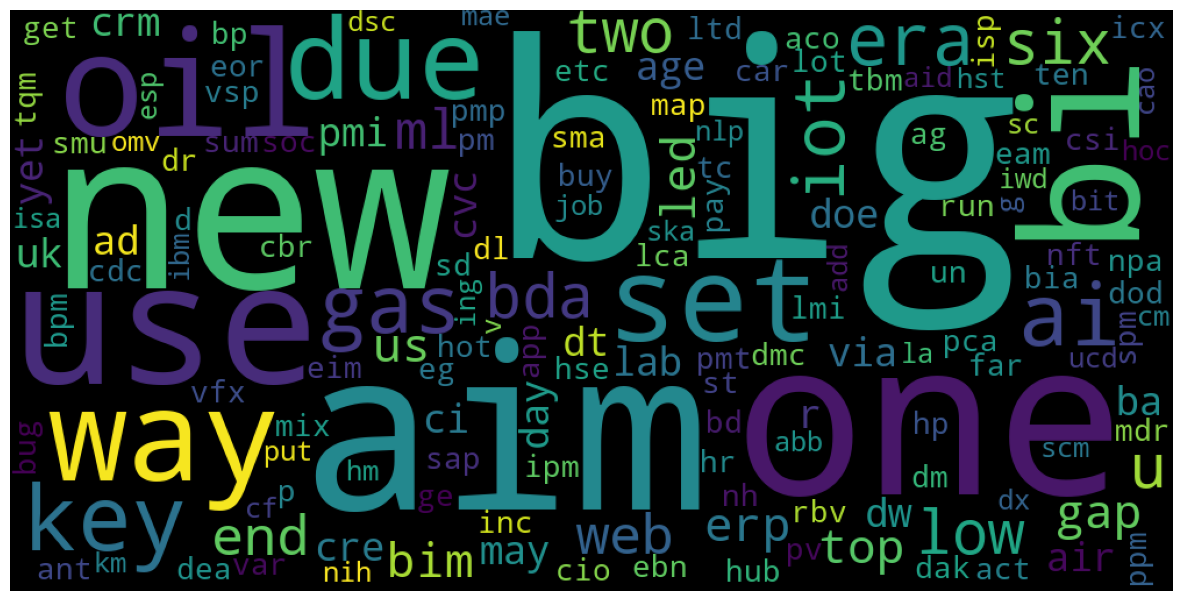

In [39]:
word_could_dict=Counter(scopusWords)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [40]:
vectorizerFr = TfidfVectorizer()
vecsFr = vectorizerFr.fit_transform(tokenizedFrameworkData['Words'])
featureNamesFr = vectorizerFr.get_feature_names_out()
denseFr = vecsFr.todense()
lstFr = denseFr.tolist()
dfIdfScoreFr = pd.DataFrame(lstFr, columns=featureNamesFr)
dfIdfScoreFr.head()

,01,19732011,2010,20year,3click,40,9915,ability,academic,academy,...,word,work,working,world,would,wrestling,year,yet,yield,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.061452,0.069656,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.065327,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.115269,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.15787,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0


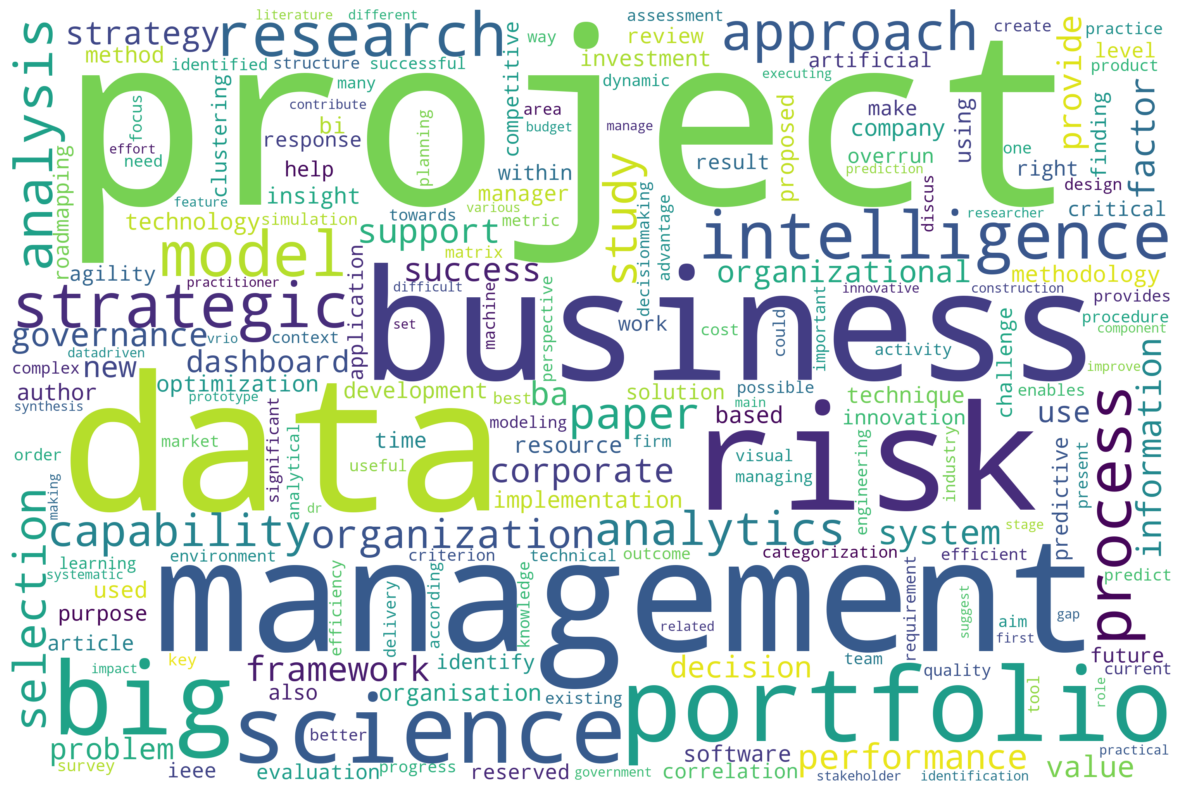

In [41]:
tfIdfCounterFr = dfIdfScoreFr.T.sum(axis=1)
wordcloudFr = WordCloud(width = 3000, height = 2000,background_color='white')
wordcloudFr.generate_from_frequencies(tfIdfCounterFr)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloudFr, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
frameworkStopwords = ["project", "portfolio", "help", "approach", "also", "new", "used", "management", "use", "time", "vrio", "aim", "could", "work", "order", "purpose", "making", "make", "related", "first", "towards", "role", "activity", "existing", "within", "one", "need", "organization", "current", "data", "paper"]
tokenizedFrameworkData["Words"] = tokenizedFrameworkData["Words"].replace('|'.join(frameworkStopwords), '', regex=True)
tokenizedFrameworkData.head()

,Title,Abstract,Criterios,Words,category_id
0,A Dashboard to Support Management of Business ...,Business analytics (BA) systems create value a...,Alineamiento estatégico,business analytics ba system create value prov...,0
1,Project portfolio selection problems: A review...,Project portfolio selection has been the focus...,Manejo de valor,selection focus many scholar last two decade...,1
2,A decision-making framework for project portfo...,The work we describe addresses the problem of ...,Alineamiento estatégico,describe address problem deciding funding opp...,0
3,Big data analytics in innovation processes: wh...,Purpose: The purpose of this paper is to analy...,Alineamiento estatégico,analyze dynamic capability perspective big...,0
4,A Data-driven project categorization process f...,Purpose: Categorizing projects allows for bett...,Alineamiento estatégico,categorizing allows better alignment al str...,0


In [43]:
vectorizerSc = TfidfVectorizer()
vecsSc = vectorizerSc.fit_transform(tokenizedScopusData['Words'])
featureNamesSc = vectorizerSc.get_feature_names_out()
denseSc = vecsSc.todense()
lstSc = denseSc.tolist()
dfIdfScoreSc = pd.DataFrame(lstSc, columns=featureNamesSc)
dfIdfScoreSc.head()

,000,0001,0005,001,0022,004268,005,0050tw,01,0140,...,zoho,zoltners,zone,zorg,zos,zscore,zscores,zulia,zumbi,zur
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


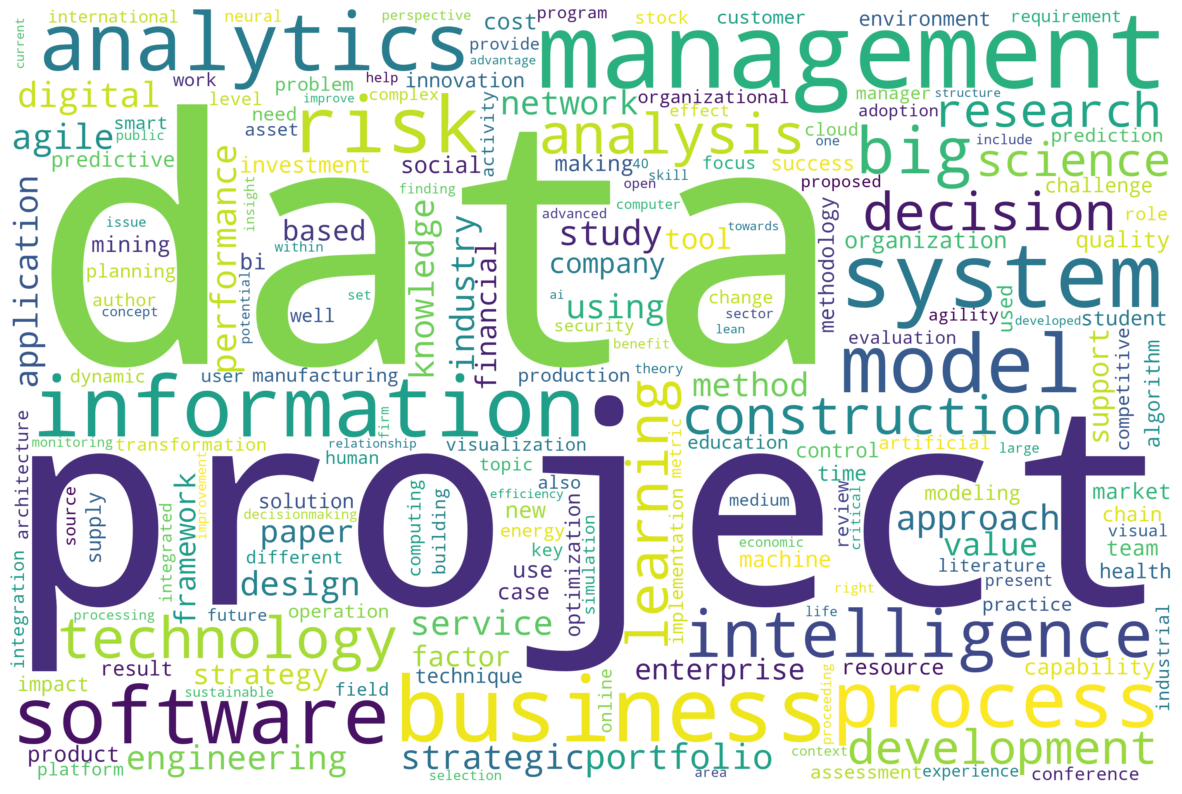

In [44]:
tfIdfCounterSc = dfIdfScoreSc.T.sum(axis=1)
wordcloudSc = WordCloud(width = 3000, height = 2000,background_color='white')
wordcloudSc.generate_from_frequencies(tfIdfCounterSc)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloudSc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
scopusStopwords = ["project", "portfolio", "develop", "approach", "system", "tool", "used", "team", "current", "activity", "structure", "present", "data", "need", "within", "open", "right", "time", "paper", "proceeding", "new", "different", "towards", "case", "topic", "based"]
tokenizedScopusData["Words"] = tokenizedScopusData["Words"].replace('|'.join(scopusStopwords), '', regex=True)
tokenizedScopusData.head()

,Title,Words
0,Constructive Alignment by Portfolio Exams for ...,show useful paradigm constructive alignment a...
1,Realising the promises of artificial intellige...,support manufacturing firm realising value art...
2,Application of Geographic Information Systems ...,technology global sets enable transport asse...
3,Optimization algorithms and investment portfol...,purpose aim examine commodity manager perspe...
4,Harnessing the power of synthetic data in heal...,driven decisionmaking modern healthcare underp...


In [46]:
tokenizedScopusData['Words'] = tokenizedScopusData['Words'].replace(value='', regex=r'\b(?!big)(?!dat)[a-z]{1,3}\b')
tokenizedScopusData['Words'].head()

0     show useful paradigm constructive alignment a...
1    support manufacturing firm realising value art...
2     technology global sets enable transport  asse...
3    purpose   examine commodity  manager perspecti...
4    driven decisionmaking modern healthcare underp...
Name: Words, dtype: object

In [47]:
tokenizedFrameworkData['Words'] = tokenizedFrameworkData['Words'].replace(value='', regex=r'\b(?!big)(?!dat)[a-z]{1,3}\b')
tokenizedFrameworkData['Words'].head()

0    business analytics  system create value provid...
1      selection focus many scholar last  decade nu...
2     describe address problem deciding funding opp...
3       analyze dynamic capability perspective  big...
4     categorizing  allows better alignment   strat...
Name: Words, dtype: object

In [48]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(tokenizedFrameworkData.Words).toarray()
labels = tokenizedFrameworkData.category_id
features.shape

(45, 135)

In [49]:
N = 8
for Criterion, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Criterion))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Alineamiento estatégico':
  . Most correlated unigrams:
. decision
. competitive
. practical
. learning
. practitir
. selection
. proposed
. strategy
  . Most correlated bigrams:
. artificial intelligence
. right reserved
. success factor
. business intelligence
. competitive advantage
# 'Manejo de gobernanza':
  . Most correlated unigrams:
. ieee
. information
. intelligence
. achieve
. strategic
. future
. corporate
. environment
  . Most correlated bigrams:
. right reserved
. success factor
. competitive advantage
. artificial intelligence
. business intelligence
# 'Manejo de riesgo':
  . Most correlated unigrams:
. outcome
. manager
. nature
. managing
. corporate
. increase
. procedure
. risk
  . Most correlated bigrams:
. artificial intelligence
. right reserved
. success factor
. competitive advantage
. business intelligence
# 'Manejo de valor':
  . Most correlated unigrams:
. success
. cost
. technical
. focus
. team
. review
. identified
. effort
  . Most correlated bigrams

## 5. Modelo predictivo de clasificación

### 5.1. Preparación del conjunto de entrenamiento

In [389]:
tfidfconverter = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2), encoding='latin-1', min_df=7, stop_words=('english'))
features = tfidfconverter.fit_transform(tokenizedFrameworkData.Words).toarray()
labels = tokenizedFrameworkData['Criterios']

### 5.2 Evaluación de algoritmos de predicción

C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

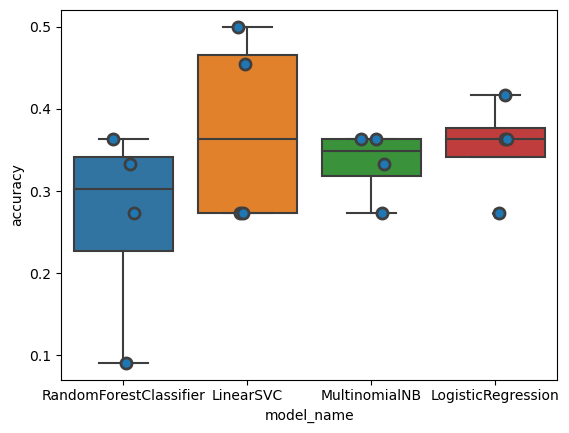

In [394]:
models = [
    RandomForestClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(),
]
CV = 4
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [396]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.375000
LogisticRegression        0.354167
MultinomialNB             0.333333
RandomForestClassifier    0.265152
Name: accuracy, dtype: float64

### 5.3 Evaluación del modelo LinearSVC

Before OverSampling, the shape of train_X: (31, 135)
Before OverSampling, the shape of train_y: (31,) 

After OverSampling, the shape of train_X: (60, 135)
After OverSampling, the shape of train_y: (60,) 



C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

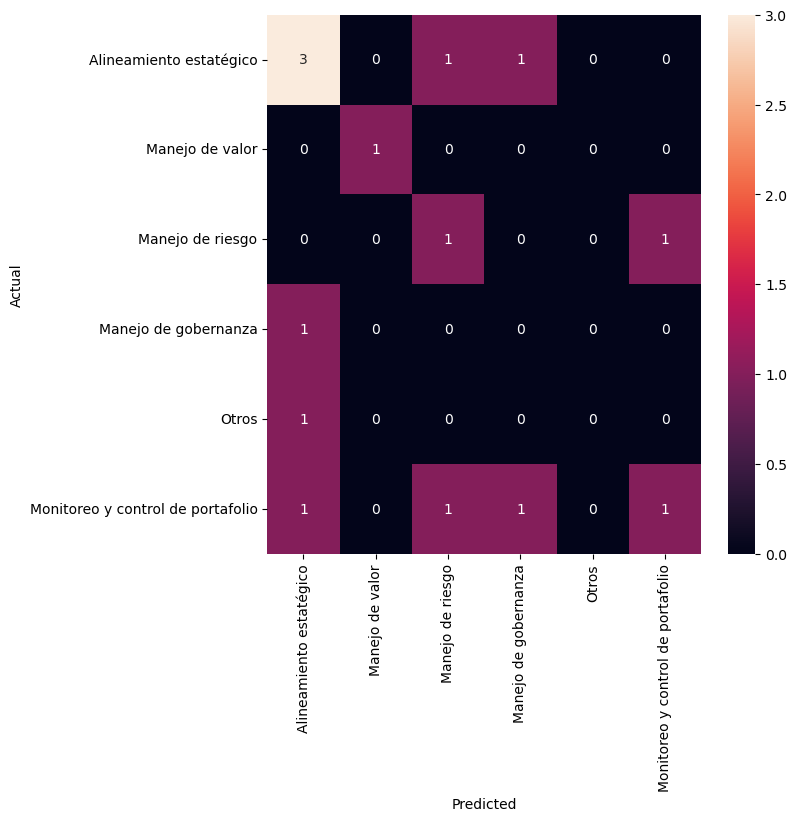

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
smote = SMOTE(random_state=0, k_neighbors=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape)) 
model = LinearSVC()
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id_df.Criterios.values, yticklabels=category_id_df.Criterios.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()